In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import anndata
import scanpy.external as sce
import seaborn as sns
import matplotlib as mpl
import seaborn as sns
from matplotlib.pyplot import rc_context
import hvplot.pandas
from matplotlib.patches import Patch

In [2]:
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import skewnorm

from scipy.stats import gamma
from scipy.stats import weibull_min
from scipy.stats import weibull_max
from scipy.stats import pearsonr


In [690]:
exp100=sc.read_10x_h5('filtered_feature_bc_matrix_100.h5',gex_only=False)
exp105=sc.read_10x_h5('filtered_feature_bc_matrix_105.h5',gex_only=False)
exp106=sc.read_10x_h5('filtered_feature_bc_matrix_106.h5',gex_only=False)


/Users/ycheng/opt/anaconda3/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/ycheng/opt/anaconda3/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/ycheng/opt/anaconda3/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [691]:
exp100

AnnData object with n_obs × n_vars = 4630 × 36692
    var: 'gene_ids', 'feature_types', 'genome'

In [692]:
rna

View of AnnData object with n_obs × n_vars = 3797 × 36692
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p'
    layers: 'counts'

In [693]:
exp100.var_names_make_unique()
exp105.var_names_make_unique()
exp106.var_names_make_unique()

In [694]:
sc.pp.filter_cells(exp100, min_genes=700)
# sc.pp.filter_genes(exp100, min_cells=3)
exp100.var['mt'] = exp100.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(exp100, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [695]:
sc.pp.filter_cells(exp105, min_genes=500)
# sc.pp.filter_genes(exp100, min_cells=3)
exp105.var['mt'] = exp105.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(exp105, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [696]:
sc.pp.filter_cells(exp106, min_genes=1000)
# sc.pp.filter_genes(exp100, min_cells=3)
exp106.var['mt'] = exp106.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(exp106, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

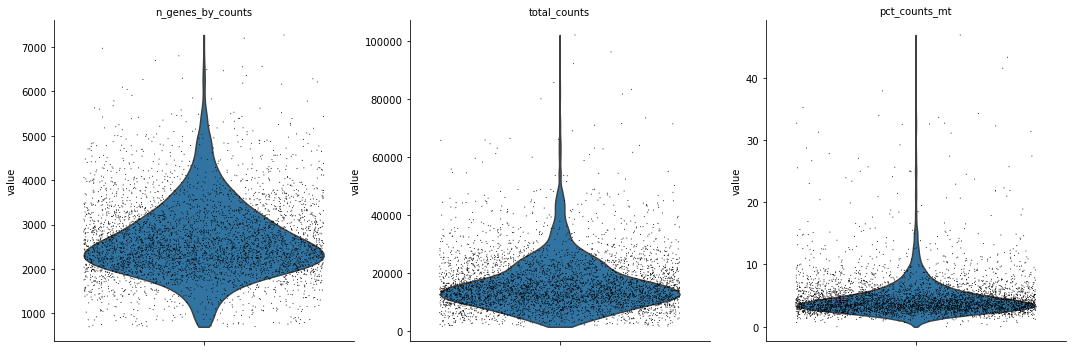

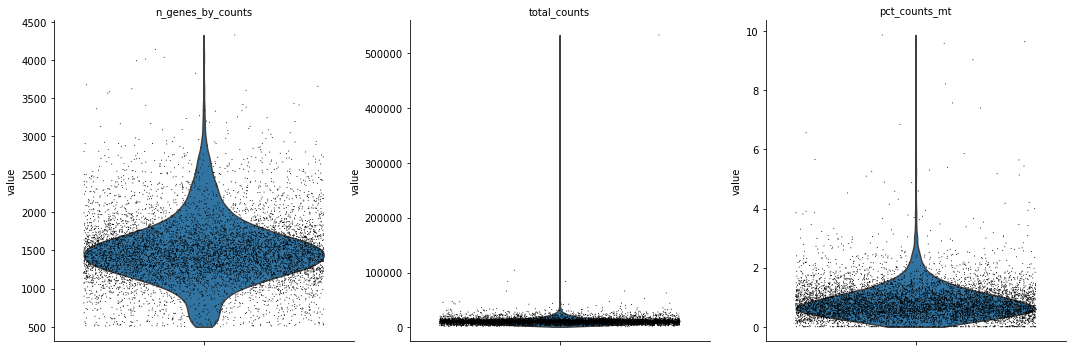

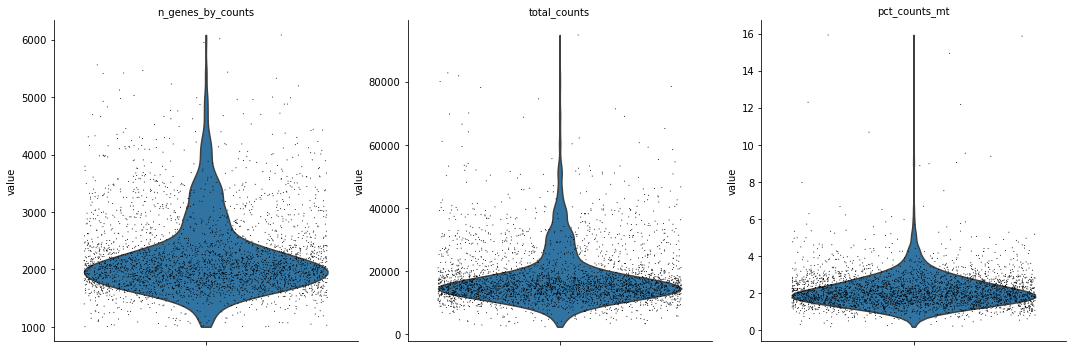

In [697]:
sc.pl.violin(exp100, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)
sc.pl.violin(exp105, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)
sc.pl.violin(exp106, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

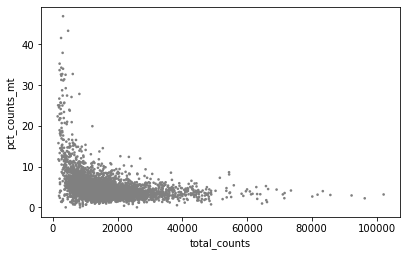

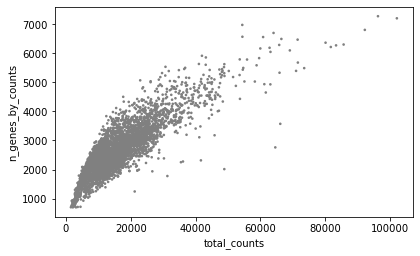

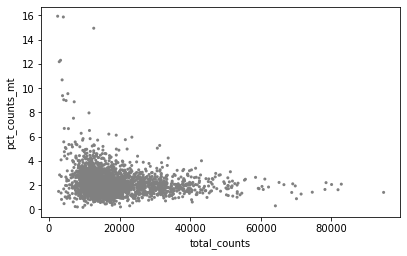

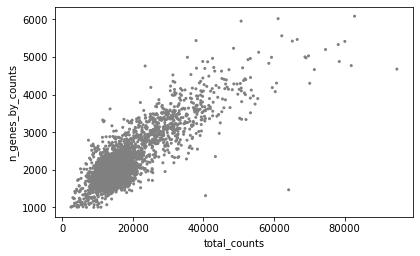

In [698]:
sc.pl.scatter(exp100, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(exp100, x='total_counts', y='n_genes_by_counts')

sc.pl.scatter(exp106, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(exp106, x='total_counts', y='n_genes_by_counts')

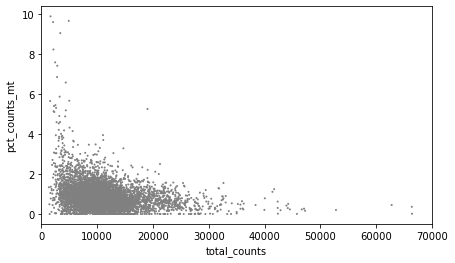

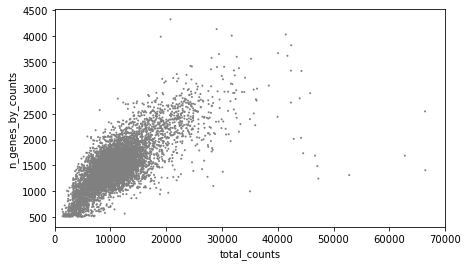

In [699]:
with rc_context({'figure.figsize': (7, 4)}):
    fig, ax = plt.subplots()
    ax.set_xlim(0,70000)

    sc.pl.scatter(exp105, x='total_counts', y='pct_counts_mt',ax=ax)
#     sc.pl.scatter(exp100, x='IgG_ADT', y='MT-CO1',ax=ax)
with rc_context({'figure.figsize': (7, 4)}):
    fig, ax = plt.subplots()
    ax.set_xlim(0,70000)

    sc.pl.scatter(exp105, x='total_counts', y='n_genes_by_counts',ax=ax)


In [700]:
exp100 = exp100[exp100.obs.total_counts < 50000, :]
exp100 = exp100[exp100.obs.pct_counts_mt < 10, :]

In [701]:
exp105 = exp105[exp105.obs.total_counts < 35000, :]
exp105 = exp105[exp105.obs.pct_counts_mt < 2.5, :]

In [702]:
exp106 = exp106[exp106.obs.total_counts < 50000, :]
exp106 = exp106[exp106.obs.pct_counts_mt < 5, :]

In [703]:
exp100,exp105,exp106

(View of AnnData object with n_obs × n_vars = 4140 × 36692
     obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
     var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts',
 View of AnnData object with n_obs × n_vars = 7157 × 36698
     obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
     var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts',
 View of AnnData object with n_obs × n_vars = 3155 × 36692
     obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
     var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts')

In [704]:
exp100_=exp100.copy()
exp105_=exp105.copy()
exp106_=exp106.copy()

In [705]:
exp100_ = exp100_[(exp100_.obs_vector('IgG_ADT') <2000), :]
exp106_ = exp106_[(exp106_.obs_vector('IgG_ADT') <2000), :]
exp105_ = exp105_[(exp105_.obs_vector('IgG_ADT') <350), :]
#exp105 has other cell surface tag, IgG_ADT compromised, lower then exp100 and exp106

In [706]:
exp100_,exp105_,exp106_

(View of AnnData object with n_obs × n_vars = 4109 × 36692
     obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
     var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts',
 View of AnnData object with n_obs × n_vars = 7090 × 36698
     obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
     var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts',
 View of AnnData object with n_obs × n_vars = 3123 × 36692
     obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
     var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts')

In [707]:
exp100_.layers["counts"] = exp100_.X.copy()

exp105_.layers["counts"] = exp105_.X.copy()

exp106_.layers["counts"] = exp106_.X.copy()
# sc.pp.filter_genes(exp106_, min_counts=0) #first analysis


In [729]:
rna=exp106_

In [730]:
rna

AnnData object with n_obs × n_vars = 3123 × 36692
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    layers: 'counts'

In [718]:
u=np.exp(1)

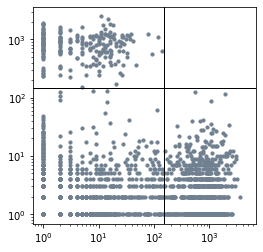

In [734]:
x='IGHM'
y='IGHA1' 
fig=plt.figure(figsize=(4,4)) 
plt.scatter(rna.obs_vector(x),rna.obs_vector(y),label="IG",color='slategrey',s=10) 
plt.xscale('log')
plt.yscale('log')
plt.axvline(x=u**5,linewidth=1, c='k') 
plt.axhline(y=u**5,linewidth=1, c='k')

In [744]:
rna

View of AnnData object with n_obs × n_vars = 2681 × 36692
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    layers: 'counts'

In [745]:
#exp106
#cleanup doublet, we do this manually and observe the distribution simultaneously
#heavy chain isotype should be exclusive #IgM # IgA
m=u**5
a1=u**5
a2=u**3
g1=u**3.5
g2=u**3.5
g3=u**3.5
g4=u**2.5
rna=rna[~((rna.obs_vector('IGHM') > m) & (rna.obs_vector('IGHA1') > a1))] 
rna=rna[~((rna.obs_vector('IGHM') > m) & (rna.obs_vector('IGHA2') > a2))] 

rna=rna[~((rna.obs_vector('IGHM') > m) & (rna.obs_vector('IGHG1') > g1))] 
rna=rna[~((rna.obs_vector('IGHM') > m) & (rna.obs_vector('IGHG2') > g2))] 
rna=rna[~((rna.obs_vector('IGHM') > m) & (rna.obs_vector('IGHG3') > g3))] 
rna=rna[~((rna.obs_vector('IGHM') > m) & (rna.obs_vector('IGHG4') > g4))] 

rna=rna[~((rna.obs_vector('IGHA1') > a1) & (rna.obs_vector('IGHG1') > g1))] 
rna=rna[~((rna.obs_vector('IGHA1') > a1) & (rna.obs_vector('IGHG2') > g2))] 
rna=rna[~((rna.obs_vector('IGHA1') > a1) & (rna.obs_vector('IGHG3') > g3))] 
rna=rna[~((rna.obs_vector('IGHA1') > a1) & (rna.obs_vector('IGHG4') > g4))] 

rna=rna[~((rna.obs_vector('IGHA2') > a2) & (rna.obs_vector('IGHG1') > g1))] 

# #heavy chain isotype should be exclusive #IgG 
rna=rna[~((rna.obs_vector('IGHG1') > u**5) & (rna.obs_vector('IGHG2') > u**4))] 
rna=rna[~((rna.obs_vector('IGHG2') > u**5) & (rna.obs_vector('IGHG3') > u**3.6))] 

# #IGHG1 has linear plot likely conserve region

# # #light chain isotype should be exclusive
k=u**6.5
l1=u**6.5
l2=u**6.5
l3=u**6.5
rna=rna[~((rna.obs_vector('IGKC') >k) & (rna.obs_vector('IGLC1') > l1))] 
rna=rna[~((rna.obs_vector('IGKC') > k) & (rna.obs_vector('IGLC2') > l2))] 
rna=rna[~((rna.obs_vector('IGKC') > k) & (rna.obs_vector('IGLC3') > l3))] 

rna=rna[~((rna.obs_vector('IGLC1') > l1) & (rna.obs_vector('IGLC2') > l2))] 
rna=rna[~((rna.obs_vector('IGLC1') > l1) & (rna.obs_vector('IGLC3') > l3))] 

# #IGLC2 and IGLC3 has linear plot likely conserve region
rna.write('exp106.h5')


(0.25393788022002795, 1.0085494752110823e-40)
(-0.11313365550231846, 4.253729140277129e-09)


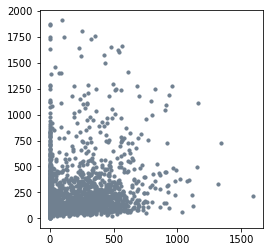

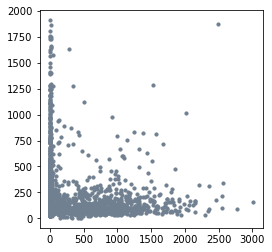

In [746]:
x='IGHG1'
y='IgG_ADT'
fig=plt.figure(figsize=(4,4))
plt.scatter(rna.obs_vector(x),rna.obs_vector(y),label="IG",color='slategrey',s=10)
# plt.axvline(x=6.5,linewidth=1, c='k')
# plt.axhline(y=6,linewidth=1, c='k')
print (pearsonr(rna.obs_vector(x),rna.obs_vector(y)))
x='IGHM'
y='IgG_ADT'
fig=plt.figure(figsize=(4,4))
plt.scatter(rna.obs_vector(x),rna.obs_vector(y),label="IG",color='slategrey',s=10)
# plt.axvline(x=6.5,linewidth=1, c='k')
# plt.axhline(y=6,linewidth=1, c='k')
print(pearsonr(rna.obs_vector(x),rna.obs_vector(y)))

In [747]:
rna=exp105_

In [748]:
rna

AnnData object with n_obs × n_vars = 7090 × 36698
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    layers: 'counts'

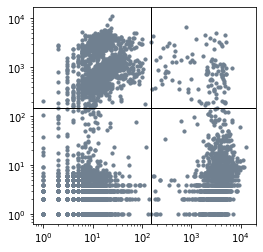

In [750]:
x='IGLC1'
y='IGLC3' 
fig=plt.figure(figsize=(4,4)) 
plt.scatter(rna.obs_vector(x),rna.obs_vector(y),label="IG",color='slategrey',s=10) 
plt.xscale('log')
plt.yscale('log')
plt.axvline(x=u**5,linewidth=1, c='k') 
plt.axhline(y=u**5,linewidth=1, c='k')

In [752]:
rna

View of AnnData object with n_obs × n_vars = 6413 × 36698
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    layers: 'counts'

In [753]:
#exp105
#cleanup doublet, we do this manually and observe the distribution simultaneously
#heavy chain isotype should be exclusive #IgM # IgA

m=u**4.5
a1=u**4
a2=u**2
g1=u**3
g2=u**3
g3=u**5
g4=u**3.5
rna=rna[~((rna.obs_vector('IGHM') > m) & (rna.obs_vector('IGHA1') > a1))] 
rna=rna[~((rna.obs_vector('IGHM') > m) & (rna.obs_vector('IGHG1') > g1))] 
rna=rna[~((rna.obs_vector('IGHM') > m) & (rna.obs_vector('IGHG2') > g2))] 
rna=rna[~((rna.obs_vector('IGHM') > m) & (rna.obs_vector('IGHG3') > g3))] 
rna=rna[~((rna.obs_vector('IGHM') > m) & (rna.obs_vector('IGHG4') > g4))] 

rna=rna[~((rna.obs_vector('IGHA1') > a1) & (rna.obs_vector('IGHG1') > g1))] 
rna=rna[~((rna.obs_vector('IGHA1') > a1) & (rna.obs_vector('IGHG2') > g2))] 
rna=rna[~((rna.obs_vector('IGHA1') > a1) & (rna.obs_vector('IGHG3') > g3))] 
rna=rna[~((rna.obs_vector('IGHA1') > a1) & (rna.obs_vector('IGHG4') > g4))] 


# #heavy chain isotype should be exclusive #IgG 
rna=rna[~((rna.obs_vector('IGHG1') > u**5.3) & (rna.obs_vector('IGHG2') > u**3.5))] 
rna=rna[~((rna.obs_vector('IGHG1') > u**3) & (rna.obs_vector('IGHG3') > u**5.5))] 
rna=rna[~((rna.obs_vector('IGHG1') > u**3) & (rna.obs_vector('IGHG4') > u**3.5))] 
rna=rna[~((rna.obs_vector('IGHG2') > u**3.5) & (rna.obs_vector('IGHG3') > u**3.5))] 
rna=rna[~((rna.obs_vector('IGHG2') > u**3.5) & (rna.obs_vector('IGHG4') > u**3.5))] 
rna=rna[~((rna.obs_vector('IGHG3') > u**3.5) & (rna.obs_vector('IGHG4') > u**3.5))] 

# # #IGHG1 has linear plot likely conserve region

# # #light chain isotype should be exclusive
k=u**6
l1=u**6
l2=u**6
l3=u**5
rna=rna[~((rna.obs_vector('IGKC') >k) & (rna.obs_vector('IGLC1') > l1))] 
rna=rna[~((rna.obs_vector('IGKC') > k) & (rna.obs_vector('IGLC2') > l2))] 
rna=rna[~((rna.obs_vector('IGKC') > k) & (rna.obs_vector('IGLC3') > l3))] 

rna=rna[~((rna.obs_vector('IGLC1') > l1) & (rna.obs_vector('IGLC2') > l2))] 
rna=rna[~((rna.obs_vector('IGLC1') > l1) & (rna.obs_vector('IGLC3') > l3))] 

#IGLC2 and IGLC3 has linear plot likely conserve region
rna.write('exp105.h5')


(0.14482225959312542, 2.1190384377092534e-31)
(-0.07155850738671164, 9.652211498894571e-09)


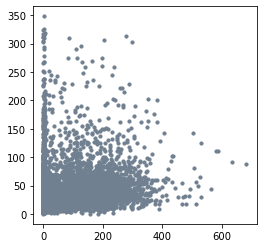

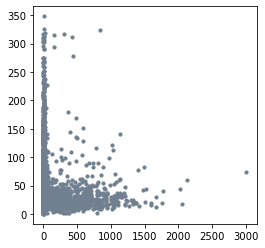

In [754]:
x='IGHG1'
y='IgG_ADT'
fig=plt.figure(figsize=(4,4))
plt.scatter(rna.obs_vector(x),rna.obs_vector(y),label="IG",color='slategrey',s=10)
# plt.axvline(x=6.5,linewidth=1, c='k')
# plt.axhline(y=6,linewidth=1, c='k')
print (pearsonr(rna.obs_vector(x),rna.obs_vector(y)))
x='IGHM'
y='IgG_ADT'
fig=plt.figure(figsize=(4,4))
plt.scatter(rna.obs_vector(x),rna.obs_vector(y),label="IG",color='slategrey',s=10)
# plt.axvline(x=6.5,linewidth=1, c='k')
# plt.axhline(y=6,linewidth=1, c='k')
print(pearsonr(rna.obs_vector(x),rna.obs_vector(y)))

In [757]:
rna=exp100_

In [758]:
rna

AnnData object with n_obs × n_vars = 4109 × 36692
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    layers: 'counts'

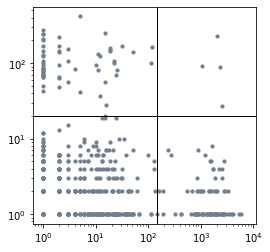

In [760]:
x='IGHM'
y='IGHA2' 
fig=plt.figure(figsize=(4,4)) 
plt.scatter(rna.obs_vector(x),rna.obs_vector(y),label="IG",color='slategrey',s=10) 
plt.xscale('log')
plt.yscale('log')
plt.axvline(x=u**5,linewidth=1, c='k') 
plt.axhline(y=u**3,linewidth=1, c='k')

In [762]:
rna

View of AnnData object with n_obs × n_vars = 3798 × 36692
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    layers: 'counts'

In [763]:
#exp100
#cleanup doublet, we do this manually and observe the distribution simultaneously
#heavy chain isotype should be exclusive #IgM # IgA

m=u**5
a1=u**5
a2=u**3
g1=u**4.5
g2=u**4.5
g3=u**6
g4=u**5

rna=rna[~((rna.obs_vector('IGHM') > m) & (rna.obs_vector('IGHA1') > a1))] 
rna=rna[~((rna.obs_vector('IGHM') > m) & (rna.obs_vector('IGHA2') > a2))] 

rna=rna[~((rna.obs_vector('IGHM') > m) & (rna.obs_vector('IGHG1') > g1))] 
rna=rna[~((rna.obs_vector('IGHM') > m) & (rna.obs_vector('IGHG2') > g2))] 
rna=rna[~((rna.obs_vector('IGHM') > m) & (rna.obs_vector('IGHG3') > g3))] 
rna=rna[~((rna.obs_vector('IGHM') > m) & (rna.obs_vector('IGHG4') > g4))] 

rna=rna[~((rna.obs_vector('IGHA1') > a1) & (rna.obs_vector('IGHG1') > g1))] 
rna=rna[~((rna.obs_vector('IGHA1') > a1) & (rna.obs_vector('IGHG2') > g2))] 
rna=rna[~((rna.obs_vector('IGHA1') > a1) & (rna.obs_vector('IGHG3') > g3))] 
rna=rna[~((rna.obs_vector('IGHA1') > a1) & (rna.obs_vector('IGHG4') > g4))] 


# # #heavy chain isotype should be exclusive #IgG 
rna=rna[~((rna.obs_vector('IGHG1') > u**5) & (rna.obs_vector('IGHG2') > u**4.5))] 
rna=rna[~((rna.obs_vector('IGHG1') > u**5) & (rna.obs_vector('IGHG3') > u**6))] 
rna=rna[~((rna.obs_vector('IGHG1') > u**5) & (rna.obs_vector('IGHG4') > u**4.5))] 
rna=rna[~((rna.obs_vector('IGHG2') > u**4.5) & (rna.obs_vector('IGHG3') > u**4.5))] 
rna=rna[~((rna.obs_vector('IGHG2') > u**4.5) & (rna.obs_vector('IGHG4') > u**5))] 
rna=rna[~((rna.obs_vector('IGHG3') > u**4.5) & (rna.obs_vector('IGHG4') > u**5))] 

# # # #IGHG1 has linear plot likely conserve region

# # # #light chain isotype should be exclusive
k=u**7
l1=u**6
l2=u**6
l3=u**6
rna=rna[~((rna.obs_vector('IGKC') >k) & (rna.obs_vector('IGLC1') > l1))] 
rna=rna[~((rna.obs_vector('IGKC') > k) & (rna.obs_vector('IGLC2') > l2))] 
rna=rna[~((rna.obs_vector('IGKC') > k) & (rna.obs_vector('IGLC3') > l3))] 

rna=rna[~((rna.obs_vector('IGLC1') > l1) & (rna.obs_vector('IGLC2') > l2))] 
rna=rna[~((rna.obs_vector('IGLC1') > l1) & (rna.obs_vector('IGLC3') > l3))] 

# #IGLC2 and IGLC3 has linear plot likely conserve region
rna.write('exp100.h5')


(0.16684789155450308, 4.1093941810054743e-25)
(-0.07740654966443074, 1.7881556956731112e-06)


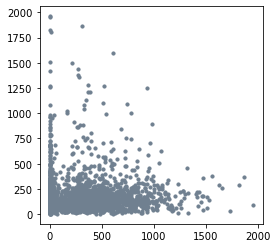

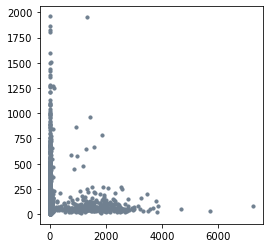

In [764]:
x='IGHG1'
y='IgG_ADT'
fig=plt.figure(figsize=(4,4))
plt.scatter(rna.obs_vector(x),rna.obs_vector(y),label="IG",color='slategrey',s=10)
# plt.axvline(x=6.5,linewidth=1, c='k')
# plt.axhline(y=6,linewidth=1, c='k')
print (pearsonr(rna.obs_vector(x),rna.obs_vector(y)))
x='IGHM'
y='IgG_ADT'
fig=plt.figure(figsize=(4,4))
plt.scatter(rna.obs_vector(x),rna.obs_vector(y),label="IG",color='slategrey',s=10)
# plt.axvline(x=6.5,linewidth=1, c='k')
# plt.axhline(y=6,linewidth=1, c='k')
print(pearsonr(rna.obs_vector(x),rna.obs_vector(y)))